# Produce New Random Data

In [1]:
%matplotlib inline

In [2]:
import numpy as np

In [3]:
random_data = np.random.random((20,2))

In [4]:
random_data

array([[0.25280292, 0.51755919],
       [0.66259067, 0.80023848],
       [0.93412836, 0.86957917],
       [0.09630744, 0.56182384],
       [0.61699825, 0.92364992],
       [0.765234  , 0.95862846],
       [0.19647613, 0.11288785],
       [0.11608579, 0.88766497],
       [0.78520403, 0.96582032],
       [0.91288363, 0.70835129],
       [0.38703578, 0.49435465],
       [0.36546199, 0.89572781],
       [0.3479882 , 0.94231946],
       [0.72502853, 0.42611943],
       [0.97850532, 0.77003793],
       [0.53831608, 0.33704851],
       [0.05382198, 0.10059536],
       [0.8362445 , 0.22117028],
       [0.85622523, 0.78343161],
       [0.01187069, 0.04019303]])

In [5]:
import matplotlib.pyplot as plt
X = random_data[:, 0]
y = random_data[:, 1]

In [6]:
import random

In [7]:
def assmuing_function(x):
    # 在我们的日常生活中是常见的
    # 体重 -> 高血压的概率
    # 收入 -> 买阿玛尼的概率
    # 其实都是一种潜在的函数关系 + 一个随机变化(扰动项以符合现实)
    return 13.4 * x + 5 + random.randint(-5, 5)

In [8]:
y = [assmuing_function(x) for x in X]

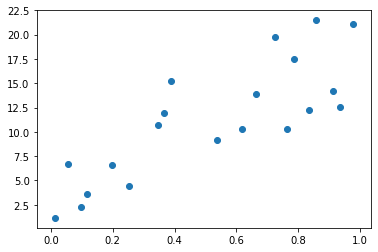

In [9]:
plt.scatter(X,y)

In [10]:
y = np.array(y)

# Regression -> Real Number
# Classification -> [0, 0, 0, 1], [0, 1, 0, 0]

In [12]:
import numpy as np
from sklearn.linear_model import LinearRegression

In [13]:
#机器学习中常遇到维度问题，reshape(-1, 1)塑形为一维以符合模型输入
reg = LinearRegression().fit(X.reshape(-1, 1), y)

In [14]:
reg.score(X.reshape(-1, 1), y)

0.6658786598365162

In [15]:
reg.coef_

array([15.02340051])

In [16]:
reg.intercept_

3.402649096197713

In [17]:
def f(x): 
    return reg.coef_ * x + reg.intercept_

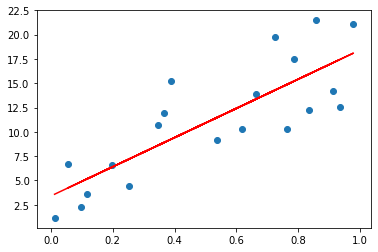

In [18]:
plt.scatter(X, y)
plt.plot(X, f(X), color='red')

In [19]:
X

array([0.25280292, 0.66259067, 0.93412836, 0.09630744, 0.61699825,
       0.765234  , 0.19647613, 0.11608579, 0.78520403, 0.91288363,
       0.38703578, 0.36546199, 0.3479882 , 0.72502853, 0.97850532,
       0.53831608, 0.05382198, 0.8362445 , 0.85622523, 0.01187069])

In [20]:
reg.predict([[0.9]])

array([16.92370956])

# How to implement a KNN Regression model

In [42]:
def model(X, y):
    # 直接存储 X,y 即可
    return [(Xi, yi) for Xi, yi in zip(X, y)]

In [44]:
from scipy.spatial.distance import cosine

In [45]:
def distance(x1, x2):
    #这里以余弦距离作为距离衡量标准
    return cosine(x1, x2)

In [49]:
def KNN_regression(x, k=3):
    # 在predicate的时候，需要做大量的计算
    most_similars = sorted(model(X, y), key=lambda xi: distance(xi[0], x))[:k]
    
    y_hats = [_y for x, _y in most_similars]
    
#     print(most_similars)
    
    return np.mean(y_hats)
    # -> regression: numerical -> most_similars (y)
    # -> classification: categorical -> most_similar (y)
    
    # 已经获得了最相似的数据集
    # 然后呢，Counter() -> most_common() -> 就可以获得出现最多的这个y了 

In [50]:
X, y

(array([0.25280292, 0.66259067, 0.93412836, 0.09630744, 0.61699825,
        0.765234  , 0.19647613, 0.11608579, 0.78520403, 0.91288363,
        0.38703578, 0.36546199, 0.3479882 , 0.72502853, 0.97850532,
        0.53831608, 0.05382198, 0.8362445 , 0.85622523, 0.01187069]),
 array([ 4.38755909, 13.878715  , 12.51732001,  2.29051976, 10.26777657,
        10.25413557,  6.63278011,  3.55554957, 17.52173397, 14.2326407 ,
        15.18627947, 11.89719066, 10.66304187, 19.71538229, 21.11197124,
         9.21343544,  6.72121456, 12.20567633, 21.47341811,  1.15906719]))

In [51]:
knnRegressionY = [KNN_regression(xi) for xi in X]

In [52]:
knnRegressionY

[8.299684731023698,
 7.845886399935043,
 11.598630814244103,
 9.703518475676598,
 10.832971594758973,
 10.26119803174774,
 13.126081774667101,
 12.660552126077581,
 9.56218492370092,
 9.62872726543621,
 10.26119803174774,
 10.832971594758973,
 10.26119803174774,
 7.273941218347919,
 8.299684731023698,
 8.299684731023698,
 10.275292038687828,
 7.176351443641283,
 10.26119803174774,
 6.398466285284891]

## K=3

'\n个人感觉KNN回归在数据样本分布比较密集时，预测是比较准确的，\n但出现稀疏数据时就很容易受到离群点的影响，且对K值是非常敏感的\n由此可推及当数据属于高维度时，引起的分布稀疏，\n该算法的效率是受到维度诅咒的严重影响的\n'

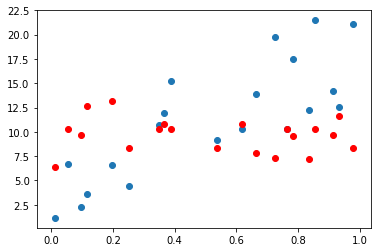

In [56]:
plt.scatter(X, y)
plt.scatter(X,knnRegressionY, color='red')
"""
个人感觉KNN回归在数据样本分布比较密集时，预测是比较准确的，
但出现稀疏数据时就很容易受到离群点的影响，且对K值是非常敏感的
由此可推及当数据属于高维度时，引起的分布稀疏，
该算法的效率是受到维度诅咒的严重影响的
"""

## K=5

'\n个人感觉KNN回归在数据样本分布比较密集时，预测是比较准确的，\n但出现稀疏数据时就很容易受到离群点的影响，且对K值是非常敏感的\n由此可推及当数据属于高维度时，引起的分布稀疏，\n该算法的效率是受到维度诅咒的严重影响的\n'

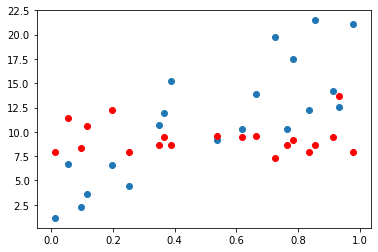

In [57]:
plt.scatter(X, y)
plt.scatter(X,[KNN_regression(xi,k=5) for xi in X], color='red')
"""
个人感觉KNN回归在数据样本分布比较密集时，预测是比较准确的，
但出现稀疏数据时就很容易受到离群点的影响，且对K值是非常敏感的
由此可推及当数据属于高维度时，引起的分布稀疏，
该算法的效率是受到维度诅咒的严重影响的
"""

# How to implement a Decision Tree

## 1. 信息熵

$$ Entropy = -\sum_i^n Pr(x_i) log(Pr(x_i)) $$

## 2. Gini 纯度

$$ Gini = 1 - \sum_{i=1}^J P_i^2 $$

In [63]:
from collections import Counter
from icecream import ic

In [64]:
def entropy(elements):
    '''群体的混乱程度，信息熵'''
    counter = Counter(elements)
    probs = [counter[c] / len(elements) for c in set(elements)]
    ic(probs)
    return - sum(p * np.log(p) for p in probs)

In [65]:
entropy([1, 1, 1, 1])

ic| probs: [1.0]


-0.0

In [66]:
entropy([1, 1, 1, 0])

ic| probs: [0.25, 0.75]


0.5623351446188083

## 决策树怎么来决定，哪一个特征来进行分割呢？

In [67]:
mock_data = {
    'gender':['F', 'F', 'F', 'F', 'M', 'M', 'M'],
    'income': ['+10', '-10', '+10', '+10', '+10', '+10', '-10'],
    'family_number': [1, 1, 2, 1, 1, 1, 2],
   # 'pet': [1, 1, 1, 0, 0, 0, 1],
    'bought': [1, 1, 1, 0, 0, 0, 1],
}

In [69]:
import pandas as pd
dataset = pd.DataFrame.from_dict(mock_data)

In [70]:
dataset

,gender,income,family_number,bought
0,F,+10,1,1
1,F,-10,1,1
2,F,+10,2,1
3,F,+10,1,0
4,M,+10,1,0
5,M,+10,1,0
6,M,-10,2,1


In [73]:
# split_by_gender: 
print(entropy([1, 1, 1, 0]) + entropy([0, 0, 1]))

# split_by_income:
print(entropy([1, 1, 0, 0, 0]) + entropy([1, 1]))

# split_by_family_number
print(entropy([1, 1, 0, 0, 0]) + entropy([1, 1]))

# 我们最希望找到一种feature， split_by_some_feature: 
# split_by_pet
entropy([1, 1, 1, 1]) + entropy([0, 0, 0])
"But这种特征只存在于理想状态中，因此要选择特征使得增益熵逼近零"

ic| probs: [0.25, 0.75]
ic| probs: [0.6666666666666666, 0.3333333333333333]
ic| probs: [0.6, 0.4]
ic| probs: [1.0]
ic| probs: [0.6, 0.4]
ic| probs: [1.0]
ic| probs: [1.0]
ic| probs: [1.0]


1.198849312913621
0.6730116670092565
0.6730116670092565


'But这种特征只存在于理想状态中，因此要选择特征使得增益熵逼近零'

## 决策树在选择决策过程，决策顺序的时候，其实是按照，根据这个特征，进行分割之后，数据的熵最少原则进行的。

In [74]:
set(mock_data['family_number'])

{1, 2}

In [75]:
set(mock_data['gender'])

{'F', 'M'}

In [76]:
sub_split_1 = dataset[dataset['family_number'] == 1]['bought'].tolist()

In [77]:
splited_data = dataset[dataset['family_number'] == 1]

In [80]:
"第一步先按增益熵最小的family_nubmer来划分"
splited_data

,gender,income,family_number,bought
0,F,+10,1,1
1,F,-10,1,1
3,F,+10,1,0
4,M,+10,1,0
5,M,+10,1,0


## ==> 根据信息熵，我们得到了一个决策过程：

```
第一步： 我们观察他的家庭成员：
        如果他的家庭成员是2人，那么就会购买，如果不是2人，我们继续决策，进入下一步
        
第二步： 我们观察他的收入情况：
        如果他的收入是'+10'， 那么他有 3/4 的概率会购买，如果是 '-10', 那么，他肯定不买
```

In [81]:
sub_split_1

[1, 1, 0, 0, 0]

In [82]:
sub_split_2 = dataset[dataset['family_number'] != 1]['bought'].tolist()

In [83]:
sub_split_2

[1, 1]

In [84]:
entropy(sub_split_1) + entropy(sub_split_2)

ic| probs: [0.6, 0.4]
ic| probs: [1.0]


0.6730116670092565

In [85]:
_sub_split_2 = dataset[dataset['gender'] != 'M']['bought'].tolist()
_sub_split_1 = dataset[dataset['gender'] != 'F']['bought'].tolist()
entropy(_sub_split_1) + entropy(_sub_split_2)

ic| probs: [0.6666666666666666, 0.3333333333333333]
ic| probs: [0.25, 0.75]


1.198849312913621

In [87]:
"可以看出来按照最佳决策划分决策树，和不是按最佳决策划分的信息熵差别是挺大的"

'可以看出来按照最佳决策划分决策树，和不是按最佳决策划分的信息熵差别是挺大的'

In [88]:
"""找到最佳的特征划分决策树，但仅限于一级，没有进一步延伸，加一个递归条件就可以改造成依次拓展每一层决策条件了
(划分次数呈2^n增长），有时间再做"""
def find_the_optimal_spilter(training_data: pd.DataFrame, target: str) -> str:
    x_fields = set(training_data.columns.tolist()) - {target}
    
    spliter = None
    min_entropy = float('inf')
    
    for f in x_fields:
        ic(f)
        values = set(training_data[f])
        ic(values)
        for v in values:
            sub_spliter_1 = training_data[training_data[f] == v][target].tolist()
            ic(sub_split_1)
            # split by the current feature and one value
            
            entropy_1 = entropy(sub_spliter_1)
#             ic(entropy_1)
            
            sub_spliter_2 = training_data[training_data[f] != v][target].tolist()
#             ic(sub_split_2)
            
            entropy_2 = entropy(sub_spliter_2)
#             ic(entropy_2)
            
            entropy_v = entropy_1 + entropy_2
#             ic(entropy_v)
            
            if entropy_v <= min_entropy:
                min_entropy = entropy_v
                spliter = (f, v)
    
    print('spliter is: {}'.format(spliter))
    print('the min entropy is: {}'.format(min_entropy))
    
    return spliter

In [89]:
find_the_optimal_spilter(training_data=dataset, target='bought')

ic| f: 'gender'
ic| values: {'F', 'M'}
ic| sub_split_1: [1, 1, 0, 0, 0]
ic| probs: [0.25, 0.75]
ic| probs: [0.6666666666666666, 0.3333333333333333]
ic| sub_split_1: [1, 1, 0, 0, 0]
ic| probs: [0.6666666666666666, 0.3333333333333333]
ic| probs: [0.25, 0.75]
ic| f: 'income'
ic| values: {'-10', '+10'}
ic| sub_split_1: [1, 1, 0, 0, 0]
ic| probs: [1.0]
ic| probs: [0.6, 0.4]
ic| sub_split_1: [1, 1, 0, 0, 0]
ic| probs: [0.6, 0.4]
ic| probs: [1.0]
ic| f: 'family_number'
ic| values: {1, 2}
ic| sub_split_1: [1, 1, 0, 0, 0]
ic| probs: [0.6, 0.4]
ic| probs: [1.0]
ic| sub_split_1: [1, 1, 0, 0, 0]
ic| probs: [1.0]
ic| probs: [0.6, 0.4]


spliter is: ('family_number', 2)
the min entropy is: 0.6730116670092565


('family_number', 2)

In [90]:
dataset[dataset['family_number'] == 2]

,gender,income,family_number,bought
2,F,+10,2,1
6,M,-10,2,1


In [91]:
dataset[dataset['family_number'] == 1]

,gender,income,family_number,bought
0,F,+10,1,1
1,F,-10,1,1
3,F,+10,1,0
4,M,+10,1,0
5,M,+10,1,0


In [92]:
find_the_optimal_spilter(dataset[dataset['family_number'] == 1], 'bought')

ic| f: 'gender'
ic| values: {'F', 'M'}
ic| sub_split_1: [1, 1, 0, 0, 0]
ic| probs: [0.3333333333333333, 0.6666666666666666]
ic| probs: [1.0]
ic| sub_split_1: [1, 1, 0, 0, 0]
ic| probs: [1.0]
ic| probs: [0.3333333333333333, 0.6666666666666666]
ic| f: 'income'
ic| values: {'-10', '+10'}
ic| sub_split_1: [1, 1, 0, 0, 0]
ic| probs: [1.0]
ic| probs: [0.75, 0.25]
ic| sub_split_1: [1, 1, 0, 0, 0]
ic| probs: [0.75, 0.25]
ic| probs: [1.0]
ic| f: 'family_number'
ic| values: {1}
ic| sub_split_1: [1, 1, 0, 0, 0]
ic| probs: [0.6, 0.4]
ic| probs: []


spliter is: ('income', '+10')
the min entropy is: 0.5623351446188083


('income', '+10')

In [93]:
fm_n_1 = dataset[dataset['family_number'] == 1]

In [94]:
fm_n_1[fm_n_1['income'] == '+10']

,gender,income,family_number,bought
0,F,+10,1,1
3,F,+10,1,0
4,M,+10,1,0
5,M,+10,1,0


In [95]:
fm_n_1[fm_n_1['income'] != '+10']

,gender,income,family_number,bought
1,F,-10,1,1


In [96]:
find_the_optimal_spilter(fm_n_1[fm_n_1['income'] == '+10'], 'bought')

ic| f: 'gender'
ic| values: {'F', 'M'}
ic| sub_split_1: [1, 1, 0, 0, 0]
ic| probs: [0.5, 0.5]
ic| probs: [1.0]
ic| sub_split_1: [1, 1, 0, 0, 0]
ic| probs: [1.0]
ic| probs: [0.5, 0.5]
ic| f: 'income'
ic| values: {'+10'}
ic| sub_split_1: [1, 1, 0, 0, 0]
ic| probs: [0.75, 0.25]
ic| probs: []
ic| f: 'family_number'
ic| values: {1}
ic| sub_split_1: [1, 1, 0, 0, 0]
ic| probs: [0.75, 0.25]
ic| probs: []


spliter is: ('family_number', 1)
the min entropy is: 0.5623351446188083


('family_number', 1)

# Evaluation Methods

## 1.Accuracy
## 2.Precision
## 3.Recall:F1 Score,F2 Score
## 4.AUC
### 判断是不是垃圾邮件,是的话程序输出1， 不是输出0
给了10个数据，这10个数据的真是情况是:
### -> [1, 1, 1, 1, 0, 1, 0, 0, 1, 1] 
### F(x) 
### -> [1, 1, 1, 1, 1, 1, 1, 1, 0, 1]

## Accuracy: 预测的标签中预测正确的值的个数 / 总的预测的个数

--> 6 / 10

## Precision:     所有说“是”的预测而且预测正确 / 所有说“是”的预测个数

--> 6 / 9

## Recall: 所有说“是”的预测而且预测正确 / 所有真正标签是“是”

--> 6 / 7

## Recall 和 Precision 其实往往是互相 tradeoff 

## F1 Score  = $ \frac{2*precision*recall}{precision + recall} $

## AOC/AUC

## A simple example of kmeans

In [98]:
from sklearn.cluster import KMeans

In [99]:
X1 = [random.randint(0, 100) for _ in range(100)]
X2 = [random.randint(0, 100) for _ in range(100)]

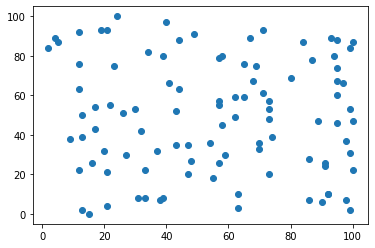

In [100]:
plt.scatter(X1, X2)

In [101]:
tranning_data = [[x1, x2] for x1, x2 in zip(X1, X2)]

In [102]:
cluster = KMeans(n_clusters=6, max_iter=500) #K-means迭代次数设置为500，比较大了

In [103]:
cluster.fit(tranning_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=500,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [104]:
cluster.cluster_centers_

array([[46.6875    , 20.3125    ],
       [90.06666667, 77.6       ],
       [22.66666667, 86.        ],
       [89.10526316, 25.15789474],
       [19.05882353, 33.05882353],
       [60.88888889, 61.16666667]])

In [105]:
cluster.labels_

array([5, 2, 2, 5, 3, 3, 5, 2, 4, 0, 1, 5, 2, 3, 3, 0, 4, 0, 4, 2, 4, 3,
       1, 3, 2, 0, 0, 5, 5, 4, 1, 1, 5, 3, 1, 2, 5, 0, 4, 2, 5, 3, 3, 4,
       0, 2, 4, 4, 1, 0, 5, 3, 3, 5, 1, 4, 1, 1, 3, 1, 1, 0, 0, 2, 0, 5,
       4, 3, 1, 5, 4, 5, 0, 2, 4, 4, 0, 2, 1, 1, 4, 2, 5, 5, 3, 3, 2, 0,
       1, 3, 2, 4, 5, 3, 3, 5, 0, 0, 3, 4], dtype=int32)

In [106]:
from collections import defaultdict
centers = defaultdict(list)

In [107]:
for label, location in zip(cluster.labels_, tranning_data):
    centers[label].append(location)

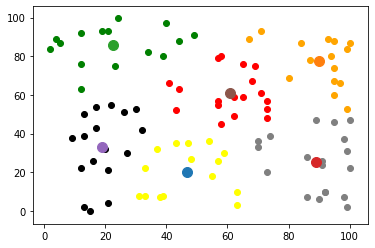

In [108]:
color = ['red', 'green', 'grey', 'black', 'yellow', 'orange']

for i, c in enumerate(centers):
    for location in centers[c]:
        plt.scatter(*location, c=color[i])
        
for center in cluster.cluster_centers_:
    plt.scatter(*center, s=100)

## Kmeans的计算复杂度

## $$ O(I * N * k * d) $$

N: 10000
k: 100
d: 500
I: 500
-> 10**(5 + 2 + 2 + 2) => 10^11 => 100个亿

In [110]:
##在维度诅咒的影响下，算法有效性急剧下降，大样本算法效率低，因此大样本中多使用MiniBatchKMeans，抽样进行聚类